In [3]:
import geopandas as gpd
import pandas as pd
import numpy as np
import folium

In [7]:

df = pd.read_csv('datasets/EPA_SmartLocationDatabase_V3_Jan_2021_Final.csv')

In [8]:

# summarize the data
df.describe()

,OBJECTID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CBSA,CBSA_POP,...,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area
count,220740.000000,2.207390e+05,2.207400e+05,220740.000000,220740.000000,220740.000000,220740.000000,167709.000000,203645.000000,2.207400e+05,...,220740.000000,220740.000000,220740.000000,220740.000000,220740.000000,220740.000000,220740.000000,220740.000000,2.207400e+05,2.207400e+05
mean,110370.500000,2.870894e+11,2.870915e+11,28.623190,85.697449,262342.382110,2.221392,341.742661,30514.836210,3.607329e+06,...,-57326.486630,-57326.597590,-57326.483325,10.500000,10.500000,10.500000,7.624884,9.541628,1.655970e+04,4.466074e+07
std,63722.293548,1.640746e+11,1.640774e+11,16.386075,98.818946,351403.837442,1.195155,125.700068,10979.471375,5.219925e+06,...,49459.959391,49459.830782,49459.963223,5.766294,5.766294,5.766294,7.812853,4.373952,3.830373e+04,6.430513e+08
min,1.000000,1.001020e+10,1.001020e+10,1.000000,1.000000,100.000000,0.000000,104.000000,10100.000000,0.000000e+00,...,-99999.000000,-99999.000000,-99999.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.685713e+02,4.435890e+03
25%,55185.750000,1.312100e+11,1.312100e+11,13.000000,29.000000,10303.000000,1.000000,218.000000,19740.000000,2.053030e+05,...,-99999.000000,-99999.000000,-99999.000000,5.750000,5.750000,5.750000,1.000000,5.833333,3.271213e+03,4.985104e+05
50%,110370.500000,2.901900e+11,2.901900e+11,29.000000,61.000000,46298.000000,2.000000,361.000000,32820.000000,1.252890e+06,...,-99999.000000,-99999.000000,-99999.000000,10.500000,10.500000,10.500000,1.000000,9.166667,5.877323e+03,1.373918e+06
75%,165555.250000,4.200350e+11,4.200350e+11,42.000000,109.000000,482503.000000,3.000000,429.000000,39300.000000,4.673634e+06,...,0.142514,0.000354,0.161708,15.250000,15.250000,15.250000,16.000000,13.166667,1.596391e+04,9.413158e+06
max,220740.000000,7.803100e+11,7.803100e+11,78.000000,840.000000,993000.000000,9.000000,566.000000,49820.000000,1.931847e+07,...,1.000000,1.000000,1.000000,20.000000,20.000000,20.000000,20.000000,20.000000,3.925989e+06,1.641290e+11


In [9]:
df.head()

,OBJECTID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CSA_Name,CBSA,...,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area
0,1,4.811300e+11,4.811300e+11,48,113,7825,4,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.184697,0.000476,0.137707,6,14,15,17,14.000000,3110.360820,297836.0831
1,2,4.811300e+11,4.811300e+11,48,113,7825,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.323221,0.000801,0.231868,3,10,12,14,10.833333,3519.469110,484945.1466
2,3,4.811300e+11,4.811300e+11,48,113,7825,3,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.314628,0.000736,0.213146,1,1,7,17,8.333333,1697.091802,106705.9281
3,4,4.811300e+11,4.811300e+11,48,113,7824,1,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.229821,0.000708,0.205018,16,10,17,17,15.666667,2922.609204,481828.4303
4,5,4.811300e+11,4.811300e+11,48,113,7824,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.164863,0.000433,0.125296,4,7,11,14,10.166667,3731.971773,687684.7752


In [10]:
# limit our data to only Massachusetts to start
df = df[df['STATEFP'] == 25]

In [11]:
df.head()

,OBJECTID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CSA_Name,CBSA,...,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area
111860,111861,2.501100e+11,2.501100e+11,25,11,40600,1,NaN,NaN,44140.0,...,-99999.000000,-99999.000000,-99999.000000,5,17,2,1,4.666667,31488.832770,5.945237e+07
111861,111862,2.501740e+11,2.501740e+11,25,17,353200,2,148.0,"Boston-Worcester-Providence, MA-RI-NH-CT",14460.0,...,0.546420,0.000859,0.469301,10,2,20,19,15.000000,2157.135729,1.506270e+05
111862,111863,2.501740e+11,2.501740e+11,25,17,374000,2,148.0,"Boston-Worcester-Providence, MA-RI-NH-CT",14460.0,...,0.058320,0.000137,0.074734,17,19,8,14,13.333333,13140.848080,3.925636e+06
111863,111864,2.501740e+11,2.501740e+11,25,17,374600,4,148.0,"Boston-Worcester-Providence, MA-RI-NH-CT",14460.0,...,0.219886,0.000298,0.162793,5,10,19,15,13.833333,2421.251995,2.867668e+05
111864,111865,2.501730e+11,2.501730e+11,25,17,339400,3,148.0,"Boston-Worcester-Providence, MA-RI-NH-CT",14460.0,...,0.412268,0.000684,0.373672,2,8,19,20,14.666667,1389.595159,1.107657e+05


In [12]:
# how many rows are left?
print(df.shape)

(4985, 117)


In [18]:
df = pd.read_csv('datasets/EPA_SmartLocationDataBase_V3_Jan_2021_Final_MA.csv')

In [19]:
df.shape

(4985, 118)

In [20]:
df.head(50000)

,Unnamed: 0,OBJECTID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CSA_Name,...,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area
0,111860,111861,2.501100e+11,2.501100e+11,25,11,40600,1,NaN,NaN,...,-99999.000000,-99999.000000,-99999.000000,5,17,2,1,4.666667,31488.832770,5.945237e+07
1,111861,111862,2.501740e+11,2.501740e+11,25,17,353200,2,148.0,"Boston-Worcester-Providence, MA-RI-NH-CT",...,0.546420,0.000859,0.469301,10,2,20,19,15.000000,2157.135729,1.506270e+05
2,111862,111863,2.501740e+11,2.501740e+11,25,17,374000,2,148.0,"Boston-Worcester-Providence, MA-RI-NH-CT",...,0.058320,0.000137,0.074734,17,19,8,14,13.333333,13140.848080,3.925636e+06
3,111863,111864,2.501740e+11,2.501740e+11,25,17,374600,4,148.0,"Boston-Worcester-Providence, MA-RI-NH-CT",...,0.219886,0.000298,0.162793,5,10,19,15,13.833333,2421.251995,2.867668e+05
4,111864,111865,2.501730e+11,2.501730e+11,25,17,339400,3,148.0,"Boston-Worcester-Providence, MA-RI-NH-CT",...,0.412268,0.000684,0.373672,2,8,19,20,14.666667,1389.595159,1.107657e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4980,116840,116841,2.501580e+11,2.501580e+11,25,15,821901,2,NaN,NaN,...,0.315724,0.002627,0.277821,17,19,19,16,17.666667,2302.720468,2.810308e+05
4981,116841,116842,2.501580e+11,2.501580e+11,25,15,821901,1,NaN,NaN,...,0.154070,0.001581,0.167224,9,12,14,13,12.500000,6498.274147,1.271918e+06
4982,116842,116843,2.502770e+11,2.502770e+11,25,27,730401,4,148.0,"Boston-Worcester-Providence, MA-RI-NH-CT",...,0.257844,0.004682,0.320302,15,11,10,18,13.666667,2499.098187,3.420802e+05
4983,116843,116844,2.500390e+11,2.500390e+11,25,3,926100,4,NaN,NaN,...,-99999.000000,-99999.000000,-99999.000000,7,4,4,1,3.500000,15927.007820,1.240604e+07


In [21]:
# limit our data to only Suffolk County, MA

df = df[df['COUNTYFP'] == 25]

In [22]:
df.shape

(646, 118)

In [23]:
df.head(1000)

,Unnamed: 0,OBJECTID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CSA_Name,...,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area
28,111888,111889,2.502510e+11,2.502510e+11,25,25,91800,1,148.0,"Boston-Worcester-Providence, MA-RI-NH-CT",...,0.265586,0.000502,0.274120,14,14,18,17,16.333333,1671.353838,154577.44300
48,111908,111909,2.502510e+11,2.502510e+11,25,25,91100,4,148.0,"Boston-Worcester-Providence, MA-RI-NH-CT",...,0.533772,0.000980,0.535397,11,14,20,19,17.166667,1058.299643,70844.51325
49,111909,111910,2.502510e+11,2.502510e+11,25,25,91100,5,148.0,"Boston-Worcester-Providence, MA-RI-NH-CT",...,0.484488,0.000824,0.449875,6,12,13,19,13.666667,1079.169499,66633.76930
50,111910,111911,2.502510e+11,2.502510e+11,25,25,91200,1,148.0,"Boston-Worcester-Providence, MA-RI-NH-CT",...,0.458661,0.000769,0.420029,7,9,20,18,15.333333,1401.571304,94929.34225
51,111911,111912,2.502510e+11,2.502510e+11,25,25,91200,2,148.0,"Boston-Worcester-Providence, MA-RI-NH-CT",...,0.449296,0.000705,0.384949,14,5,17,16,14.166667,1835.590596,124575.31170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4749,116609,116610,2.502510e+11,2.502510e+11,25,25,92400,5,148.0,"Boston-Worcester-Providence, MA-RI-NH-CT",...,0.324505,0.000573,0.313007,4,14,7,19,11.666667,1118.066132,70843.38273
4750,116610,116611,2.502510e+11,2.502510e+11,25,25,130404,3,148.0,"Boston-Worcester-Providence, MA-RI-NH-CT",...,0.190942,0.000330,0.180140,9,8,20,17,15.166667,1568.143700,132354.37680
4751,116611,116612,2.502510e+11,2.502510e+11,25,25,140102,1,148.0,"Boston-Worcester-Providence, MA-RI-NH-CT",...,0.185439,0.000347,0.189706,3,8,16,18,13.166667,1908.801503,204084.12720
4752,116612,116613,2.502520e+11,2.502520e+11,25,25,160101,3,148.0,"Boston-Worcester-Providence, MA-RI-NH-CT",...,0.383404,0.000628,0.342853,18,16,16,20,17.666667,2477.290291,381387.07990


In [24]:
df.to_csv('datasets/EPA_SmartLocationDataBase_V3_Jan_2021_MA_Suffolk.csv')

In [8]:
df = pd.read_csv('datasets/EPA_SmartLocationDataBase_V3_Jan_2021_MA_Suffolk.csv')


In [6]:
#df['TRACTCE'] = df['TRACTCE'].apply(lambda x: '{0:0>6}'.format(x))

In [9]:
df.head(1000)

,Unnamed: 0.1,Unnamed: 0,OBJECTID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,...,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area
0,28,111888,111889,2.502510e+11,2.502510e+11,25,25,91800,1,148.0,...,0.265586,0.000502,0.274120,14,14,18,17,16.333333,1671.353838,154577.44300
1,48,111908,111909,2.502510e+11,2.502510e+11,25,25,91100,4,148.0,...,0.533772,0.000980,0.535397,11,14,20,19,17.166667,1058.299643,70844.51325
2,49,111909,111910,2.502510e+11,2.502510e+11,25,25,91100,5,148.0,...,0.484488,0.000824,0.449875,6,12,13,19,13.666667,1079.169499,66633.76930
3,50,111910,111911,2.502510e+11,2.502510e+11,25,25,91200,1,148.0,...,0.458661,0.000769,0.420029,7,9,20,18,15.333333,1401.571304,94929.34225
4,51,111911,111912,2.502510e+11,2.502510e+11,25,25,91200,2,148.0,...,0.449296,0.000705,0.384949,14,5,17,16,14.166667,1835.590596,124575.31170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,4749,116609,116610,2.502510e+11,2.502510e+11,25,25,92400,5,148.0,...,0.324505,0.000573,0.313007,4,14,7,19,11.666667,1118.066132,70843.38273
642,4750,116610,116611,2.502510e+11,2.502510e+11,25,25,130404,3,148.0,...,0.190942,0.000330,0.180140,9,8,20,17,15.166667,1568.143700,132354.37680
643,4751,116611,116612,2.502510e+11,2.502510e+11,25,25,140102,1,148.0,...,0.185439,0.000347,0.189706,3,8,16,18,13.166667,1908.801503,204084.12720
644,4752,116612,116613,2.502520e+11,2.502520e+11,25,25,160101,3,148.0,...,0.383404,0.000628,0.342853,18,16,16,20,17.666667,2477.290291,381387.07990


In [10]:
df['TRACT'] = 25025000000 + df['TRACTCE'].astype(int)

In [11]:
df.head(1000)

,Unnamed: 0.1,Unnamed: 0,OBJECTID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,...,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area,TRACT
0,28,111888,111889,2.502510e+11,2.502510e+11,25,25,91800,1,148.0,...,0.000502,0.274120,14,14,18,17,16.333333,1671.353838,154577.44300,25025091800
1,48,111908,111909,2.502510e+11,2.502510e+11,25,25,91100,4,148.0,...,0.000980,0.535397,11,14,20,19,17.166667,1058.299643,70844.51325,25025091100
2,49,111909,111910,2.502510e+11,2.502510e+11,25,25,91100,5,148.0,...,0.000824,0.449875,6,12,13,19,13.666667,1079.169499,66633.76930,25025091100
3,50,111910,111911,2.502510e+11,2.502510e+11,25,25,91200,1,148.0,...,0.000769,0.420029,7,9,20,18,15.333333,1401.571304,94929.34225,25025091200
4,51,111911,111912,2.502510e+11,2.502510e+11,25,25,91200,2,148.0,...,0.000705,0.384949,14,5,17,16,14.166667,1835.590596,124575.31170,25025091200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,4749,116609,116610,2.502510e+11,2.502510e+11,25,25,92400,5,148.0,...,0.000573,0.313007,4,14,7,19,11.666667,1118.066132,70843.38273,25025092400
642,4750,116610,116611,2.502510e+11,2.502510e+11,25,25,130404,3,148.0,...,0.000330,0.180140,9,8,20,17,15.166667,1568.143700,132354.37680,25025130404
643,4751,116611,116612,2.502510e+11,2.502510e+11,25,25,140102,1,148.0,...,0.000347,0.189706,3,8,16,18,13.166667,1908.801503,204084.12720,25025140102
644,4752,116612,116613,2.502520e+11,2.502520e+11,25,25,160101,3,148.0,...,0.000628,0.342853,18,16,16,20,17.666667,2477.290291,381387.07990,25025160101


In [14]:
# df['index'] = df.index
# df['DISTRICT'] = 0
#df.loc[0, 'DISTRICT'] = 3

In [15]:
df.head(1000)

,Unnamed: 0.1,Unnamed: 0,OBJECTID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,...,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area,TRACT,index,DISTRICT
0,28,111888,111889,2.502510e+11,2.502510e+11,25,25,91800,1,148.0,...,14,14,18,17,16.333333,1671.353838,154577.44300,25025091800,0,0
1,48,111908,111909,2.502510e+11,2.502510e+11,25,25,91100,4,148.0,...,11,14,20,19,17.166667,1058.299643,70844.51325,25025091100,1,0
2,49,111909,111910,2.502510e+11,2.502510e+11,25,25,91100,5,148.0,...,6,12,13,19,13.666667,1079.169499,66633.76930,25025091100,2,0
3,50,111910,111911,2.502510e+11,2.502510e+11,25,25,91200,1,148.0,...,7,9,20,18,15.333333,1401.571304,94929.34225,25025091200,3,0
4,51,111911,111912,2.502510e+11,2.502510e+11,25,25,91200,2,148.0,...,14,5,17,16,14.166667,1835.590596,124575.31170,25025091200,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,4749,116609,116610,2.502510e+11,2.502510e+11,25,25,92400,5,148.0,...,4,14,7,19,11.666667,1118.066132,70843.38273,25025092400,641,0
642,4750,116610,116611,2.502510e+11,2.502510e+11,25,25,130404,3,148.0,...,9,8,20,17,15.166667,1568.143700,132354.37680,25025130404,642,0
643,4751,116611,116612,2.502510e+11,2.502510e+11,25,25,140102,1,148.0,...,3,8,16,18,13.166667,1908.801503,204084.12720,25025140102,643,0
644,4752,116612,116613,2.502520e+11,2.502520e+11,25,25,160101,3,148.0,...,18,16,16,20,17.666667,2477.290291,381387.07990,25025160101,644,0


In [18]:
df = df.sort_values(by=['TRACT'])
df['index'] = df.index

In [19]:
df.head(1000)

,Unnamed: 0.1,Unnamed: 0,OBJECTID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,...,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area,TRACT,index,DISTRICT
63,116,111976,111977,2.502500e+11,2.502500e+11,25,25,100,3,148.0,...,12,6,18,17,14.666667,1779.774216,1.095086e+05,25025000100,63,0
492,4264,116124,116125,2.502500e+11,2.502500e+11,25,25,100,2,148.0,...,12,17,16,18,16.166667,1609.310748,1.404161e+05,25025000100,492,0
306,2696,114556,114557,2.502500e+11,2.502500e+11,25,25,100,4,148.0,...,13,3,19,16,14.333333,1803.244338,1.711438e+05,25025000100,306,0
403,3844,115704,115705,2.502500e+11,2.502500e+11,25,25,100,1,148.0,...,19,15,19,16,17.333333,9585.685777,1.373954e+06,25025000100,403,0
290,2594,114454,114455,2.502500e+11,2.502500e+11,25,25,201,4,148.0,...,6,6,11,18,11.666667,1214.886331,8.540069e+04,25025000201,290,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,3776,115636,115637,2.502600e+11,2.502600e+11,25,25,981502,1,148.0,...,17,11,14,16,14.666667,5702.276754,1.279683e+06,25025981502,384,0
386,3778,115638,115639,2.502600e+11,2.502600e+11,25,25,981600,1,148.0,...,13,6,9,13,10.500000,5057.499174,7.458552e+05,25025981600,386,0
484,4041,115901,115902,2.502600e+11,2.502600e+11,25,25,981700,1,148.0,...,1,1,20,19,13.333333,2441.016192,3.287388e+05,25025981700,484,0
277,2021,113881,113882,2.502600e+11,2.502600e+11,25,25,981800,1,148.0,...,2,2,20,15,12.333333,12534.512410,1.071439e+06,25025981800,277,0


In [20]:
df = df.drop(columns=['index'])

In [24]:

df.head(1000)

,Unnamed: 0.1,Unnamed: 0,OBJECTID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,...,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area,TRACT,DISTRICT,index
0,116,111976,111977,2.502500e+11,2.502500e+11,25,25,100,3,148.0,...,12,6,18,17,14.666667,1779.774216,1.095086e+05,25025000100,0,63
1,4264,116124,116125,2.502500e+11,2.502500e+11,25,25,100,2,148.0,...,12,17,16,18,16.166667,1609.310748,1.404161e+05,25025000100,0,492
2,2696,114556,114557,2.502500e+11,2.502500e+11,25,25,100,4,148.0,...,13,3,19,16,14.333333,1803.244338,1.711438e+05,25025000100,0,306
3,3844,115704,115705,2.502500e+11,2.502500e+11,25,25,100,1,148.0,...,19,15,19,16,17.333333,9585.685777,1.373954e+06,25025000100,0,403
4,2594,114454,114455,2.502500e+11,2.502500e+11,25,25,201,4,148.0,...,6,6,11,18,11.666667,1214.886331,8.540069e+04,25025000201,0,290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,3776,115636,115637,2.502600e+11,2.502600e+11,25,25,981502,1,148.0,...,17,11,14,16,14.666667,5702.276754,1.279683e+06,25025981502,0,384
642,3778,115638,115639,2.502600e+11,2.502600e+11,25,25,981600,1,148.0,...,13,6,9,13,10.500000,5057.499174,7.458552e+05,25025981600,0,386
643,4041,115901,115902,2.502600e+11,2.502600e+11,25,25,981700,1,148.0,...,1,1,20,19,13.333333,2441.016192,3.287388e+05,25025981700,0,484
644,2021,113881,113882,2.502600e+11,2.502600e+11,25,25,981800,1,148.0,...,2,2,20,15,12.333333,12534.512410,1.071439e+06,25025981800,0,277


In [27]:
df.loc[df['TRACT'] == 25025100400, 'DISTRICT'] = 4
df.head(1000)

,Unnamed: 0.1,Unnamed: 0,OBJECTID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,...,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area,TRACT,DISTRICT,index
0,116,111976,111977,2.502500e+11,2.502500e+11,25,25,100,3,148.0,...,12,6,18,17,14.666667,1779.774216,1.095086e+05,25025000100,0,63
1,4264,116124,116125,2.502500e+11,2.502500e+11,25,25,100,2,148.0,...,12,17,16,18,16.166667,1609.310748,1.404161e+05,25025000100,0,492
2,2696,114556,114557,2.502500e+11,2.502500e+11,25,25,100,4,148.0,...,13,3,19,16,14.333333,1803.244338,1.711438e+05,25025000100,0,306
3,3844,115704,115705,2.502500e+11,2.502500e+11,25,25,100,1,148.0,...,19,15,19,16,17.333333,9585.685777,1.373954e+06,25025000100,0,403
4,2594,114454,114455,2.502500e+11,2.502500e+11,25,25,201,4,148.0,...,6,6,11,18,11.666667,1214.886331,8.540069e+04,25025000201,0,290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,3776,115636,115637,2.502600e+11,2.502600e+11,25,25,981502,1,148.0,...,17,11,14,16,14.666667,5702.276754,1.279683e+06,25025981502,0,384
642,3778,115638,115639,2.502600e+11,2.502600e+11,25,25,981600,1,148.0,...,13,6,9,13,10.500000,5057.499174,7.458552e+05,25025981600,0,386
643,4041,115901,115902,2.502600e+11,2.502600e+11,25,25,981700,1,148.0,...,1,1,20,19,13.333333,2441.016192,3.287388e+05,25025981700,0,484
644,2021,113881,113882,2.502600e+11,2.502600e+11,25,25,981800,1,148.0,...,2,2,20,15,12.333333,12534.512410,1.071439e+06,25025981800,0,277


In [28]:
df.loc[df['TRACT'] == 25025100500, 'DISTRICT'] = 4


In [29]:
df.head(1000)

,Unnamed: 0.1,Unnamed: 0,OBJECTID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,...,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area,TRACT,DISTRICT,index
0,116,111976,111977,2.502500e+11,2.502500e+11,25,25,100,3,148.0,...,12,6,18,17,14.666667,1779.774216,1.095086e+05,25025000100,0,63
1,4264,116124,116125,2.502500e+11,2.502500e+11,25,25,100,2,148.0,...,12,17,16,18,16.166667,1609.310748,1.404161e+05,25025000100,0,492
2,2696,114556,114557,2.502500e+11,2.502500e+11,25,25,100,4,148.0,...,13,3,19,16,14.333333,1803.244338,1.711438e+05,25025000100,0,306
3,3844,115704,115705,2.502500e+11,2.502500e+11,25,25,100,1,148.0,...,19,15,19,16,17.333333,9585.685777,1.373954e+06,25025000100,0,403
4,2594,114454,114455,2.502500e+11,2.502500e+11,25,25,201,4,148.0,...,6,6,11,18,11.666667,1214.886331,8.540069e+04,25025000201,0,290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,3776,115636,115637,2.502600e+11,2.502600e+11,25,25,981502,1,148.0,...,17,11,14,16,14.666667,5702.276754,1.279683e+06,25025981502,0,384
642,3778,115638,115639,2.502600e+11,2.502600e+11,25,25,981600,1,148.0,...,13,6,9,13,10.500000,5057.499174,7.458552e+05,25025981600,0,386
643,4041,115901,115902,2.502600e+11,2.502600e+11,25,25,981700,1,148.0,...,1,1,20,19,13.333333,2441.016192,3.287388e+05,25025981700,0,484
644,2021,113881,113882,2.502600e+11,2.502600e+11,25,25,981800,1,148.0,...,2,2,20,15,12.333333,12534.512410,1.071439e+06,25025981800,0,277


In [38]:
df['DISTRICT'] = 0

In [40]:
df.loc[df['TRACT'] == 25025100400, 'DISTRICT'] = 4
df.loc[df['TRACT'] == 25025100300, 'DISTRICT'] = 4
df.loc[df['TRACT'] == 25025100200, 'DISTRICT'] = 4
df.loc[df['TRACT'] == 25025100500, 'DISTRICT'] = 4
df.loc[df['TRACT'] == 25025100100, 'DISTRICT'] = 4
df.loc[df['TRACT'] == 25025092400, 'DISTRICT'] = 4
df.loc[df['TRACT'] == 25025092300, 'DISTRICT'] = 4
df.loc[df['TRACT'] == 25025092200, 'DISTRICT'] = 4
df.loc[df['TRACT'] == 25025092000, 'DISTRICT'] = 4
df.loc[df['TRACT'] == 25025091900, 'DISTRICT'] = 4
df.loc[df['TRACT'] == 25025090100, 'DISTRICT'] = 4
df.loc[df['TRACT'] == 25025090200, 'DISTRICT'] = 4
df.loc[df['TRACT'] == 25025082100, 'DISTRICT'] = 4
df.loc[df['TRACT'] == 25025980300, 'DISTRICT'] = 4
df.loc[df['TRACT'] == 25025110103, 'DISTRICT'] = 4
df.loc[df['TRACT'] == 25025082000, 'DISTRICT'] = 4
df.loc[df['TRACT'] == 25025081800, 'DISTRICT'] = 4
df.loc[df['TRACT'] == 25025090400, 'DISTRICT'] = 4
df.loc[df['TRACT'] == 25025090600, 'DISTRICT'] = 4
df.loc[df['TRACT'] == 25025091400, 'DISTRICT'] = 4
df.loc[df['TRACT'] == 25025090300, 'DISTRICT'] = 4
df.loc[df['TRACT'] == 25025091700, 'DISTRICT'] = 4
df.loc[df['TRACT'] == 25025091800, 'DISTRICT'] = 4
df.loc[df['TRACT'] == 25025091600, 'DISTRICT'] = 4
df.loc[df['TRACT'] == 25025091500, 'DISTRICT'] = 4


In [41]:
df.to_csv('datasets/EPA_SmartLocationDataBase_V3_Jan_2021_D4.csv')



In [44]:

df.head(1000)

,Unnamed: 0.1,Unnamed: 0,OBJECTID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,...,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area,TRACT,DISTRICT,index
0,116,111976,111977,2.502500e+11,2.502500e+11,25,25,100,3,148.0,...,12,6,18,17,14.666667,1779.774216,1.095086e+05,25025000100,0,63
1,4264,116124,116125,2.502500e+11,2.502500e+11,25,25,100,2,148.0,...,12,17,16,18,16.166667,1609.310748,1.404161e+05,25025000100,0,492
2,2696,114556,114557,2.502500e+11,2.502500e+11,25,25,100,4,148.0,...,13,3,19,16,14.333333,1803.244338,1.711438e+05,25025000100,0,306
3,3844,115704,115705,2.502500e+11,2.502500e+11,25,25,100,1,148.0,...,19,15,19,16,17.333333,9585.685777,1.373954e+06,25025000100,0,403
4,2594,114454,114455,2.502500e+11,2.502500e+11,25,25,201,4,148.0,...,6,6,11,18,11.666667,1214.886331,8.540069e+04,25025000201,0,290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,3776,115636,115637,2.502600e+11,2.502600e+11,25,25,981502,1,148.0,...,17,11,14,16,14.666667,5702.276754,1.279683e+06,25025981502,0,384
642,3778,115638,115639,2.502600e+11,2.502600e+11,25,25,981600,1,148.0,...,13,6,9,13,10.500000,5057.499174,7.458552e+05,25025981600,0,386
643,4041,115901,115902,2.502600e+11,2.502600e+11,25,25,981700,1,148.0,...,1,1,20,19,13.333333,2441.016192,3.287388e+05,25025981700,0,484
644,2021,113881,113882,2.502600e+11,2.502600e+11,25,25,981800,1,148.0,...,2,2,20,15,12.333333,12534.512410,1.071439e+06,25025981800,0,277


In [46]:

df.loc[df['DISTRICT'] == 4, 'TotPop'].sum()

105764

<AxesSubplot: title={'center': 'Total Employment by District'}, xlabel='District', ylabel='TotEmp'>

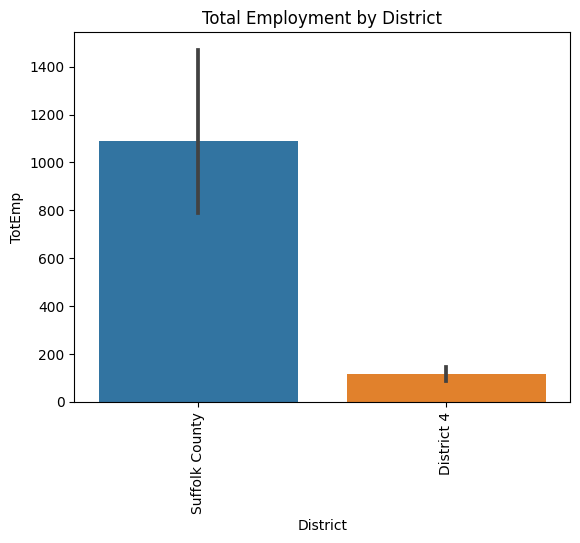

In [48]:
import seaborn as sns

plot = sns.barplot(x='DISTRICT', y='TotEmp', data=df)

plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plot.set_title('Total Employment by District')
plot.set_xlabel('District')

# change x label for District 0 to "Suffolk County"
plot.set_xticklabels(['Suffolk County', 'District 4'])
# show the plot
plot

<AxesSubplot: xlabel='DISTRICT', ylabel='D2A_JPHH'>

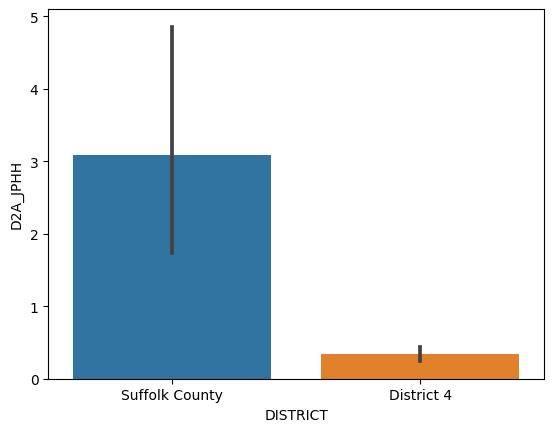

In [51]:
plot2 = sns.barplot(x='DISTRICT', y='D2A_JPHH', data=df)
plot2.set_xticklabels(['Suffolk County', 'District 4'])
plot2